In [1]:

!pip install tensorflow numpy matplotlib opencv-python


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [3]:
base_dir = r"C:\Users\Mayuri\Desktop\Medical plant identification\Medicinal plant dataset"


In [4]:
# Define parameters
img_height, img_width = 224, 224
batch_size = 32

# Create ImageDataGenerator instances for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load training data
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',          # Set as training data
    shuffle=True
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation'        # Set as validation data
)


Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [5]:
# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)  # Number of classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the path to your dataset
dataset_path = "C:\\Users\\Mayuri\\Desktop\\Medical plant identification\\Medicinal plant dataset"

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the MobileNetV2 model, pre-trained on ImageNet, without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final output layer

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers to retain the pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 20
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Unfreeze some layers and fine-tune (optional)
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

# Recompile the model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Save the trained model
model.save('medicinal_plant_classifier.h5')


Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.
Epoch 1/20


C:\Users\Mayuri\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.4492 - loss: 2.2059 - val_accuracy: 0.7674 - val_loss: 0.7625
Epoch 2/20
  1/148 ━━━━━━━━━━━━━━━━━━━━ 2:22 969ms/step - accuracy: 0.9375 - loss: 0.3265

C:\Users\Mayuri\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9375 - loss: 0.3265 - val_accuracy: 0.8571 - val_loss: 0.5525
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.8240 - loss: 0.5744 - val_accuracy: 0.8290 - val_loss: 0.5421
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8750 - loss: 0.4353 - val_accuracy: 0.9286 - val_loss: 0.2611
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.8911 - loss: 0.3772 - val_accuracy: 0.8472 - val_loss: 0.4536
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7812 - loss: 0.4594 - val_accuracy: 0.6786 - val_loss: 0.8298
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - accuracy: 0.9178 - loss: 0.2692 - val_accuracy: 0.8203 - val_loss: 0.6243
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9062 - loss: 0.3011 - val_accuracy: 0.8929 - val_loss: 0.3637
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 393s 3s/step - accuracy: 0.9395 - loss: 0.2090 - val_accuracy: 0.8793 -

NameError: name 'history' is not defined

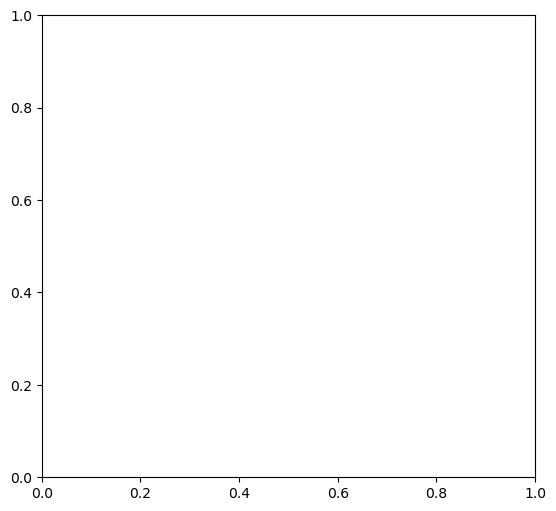

In [4]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values for both phases
plt.figure(figsize=(14, 6))

# Plot initial training phase accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy (Initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.title('Model Accuracy (Initial Training)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot fine-tuning phase accuracy if it exists
if 'accuracy' in history_fine.history and 'val_accuracy' in history_fine.history:
    plt.plot(range(len(history_fine.history['accuracy'])), history_fine.history['accuracy'], label='Train Accuracy (Fine-tuning)', linestyle='--')
    plt.plot(range(len(history_fine.history['val_accuracy'])), history_fine.history['val_accuracy'], label='Validation Accuracy (Fine-tuning)', linestyle='--')

# Plot initial training phase loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss (Initial)')
plt.plot(history.history['val_loss'], label='Validation Loss (Initial)')
plt.title('Model Loss (Initial Training)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot fine-tuning phase loss if it exists
if 'loss' in history_fine.history and 'val_loss' in history_fine.history:
    plt.plot(range(len(history_fine.history['loss'])), history_fine.history['loss'], label='Train Loss (Fine-tuning)', linestyle='--')
    plt.plot(range(len(history_fine.history['val_loss'])), history_fine.history['val_loss'], label='Validation Loss (Fine-tuning)', linestyle='--')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
dataset_path = "C:\\Users\\Mayuri\\Desktop\\Medical plant identification\\Medicinal plant dataset"

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.2)

# Flow from the directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Print all class labels
print("Classes in the dataset:")
for idx, class_name in enumerate(class_labels):
    print(f"{idx + 1}: {class_name}")


Found 4765 images belonging to 40 classes.
Classes in the dataset:
1: Aloevera
2: Amla
3: Amruta_Balli
4: Arali
5: Ashoka
6: Ashwagandha
7: Avacado
8: Bamboo
9: Basale
10: Betel
11: Betel_Nut
12: Brahmi
13: Castor
14: Curry_Leaf
15: Doddapatre
16: Ekka
17: Ganike
18: Gauva
19: Geranium
20: Henna
21: Hibiscus
22: Honge
23: Insulin
24: Jasmine
25: Lemon
26: Lemon_grass
27: Mango
28: Mint
29: Nagadali
30: Neem
31: Nithyapushpa
32: Nooni
33: Pappaya
34: Pepper
35: Pomegranate
36: Raktachandini
37: Rose
38: Sapota
39: Tulasi
40: Wood_sorel


Found 4765 images belonging to 40 classes.


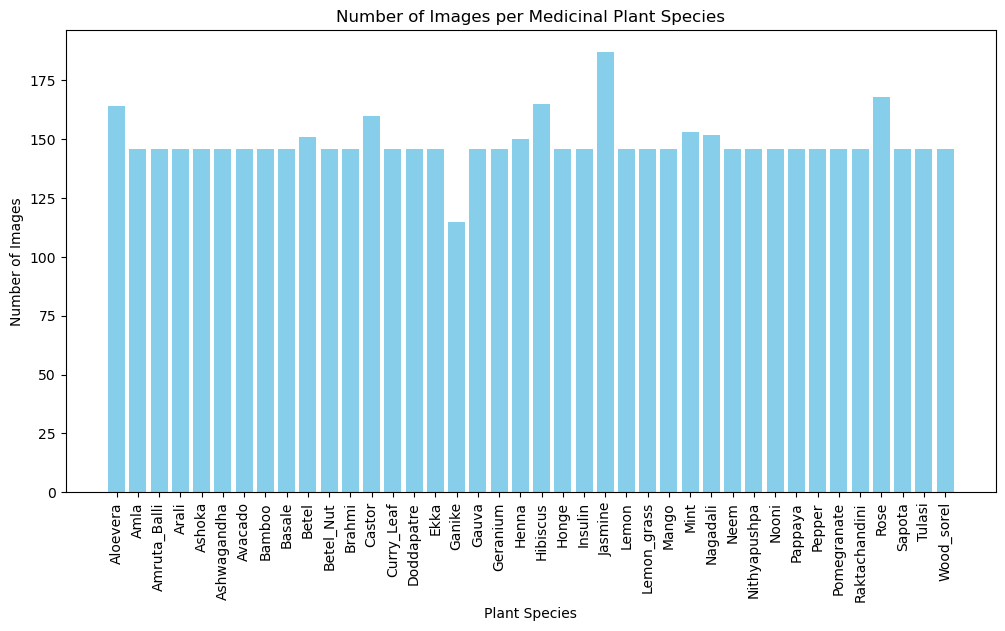

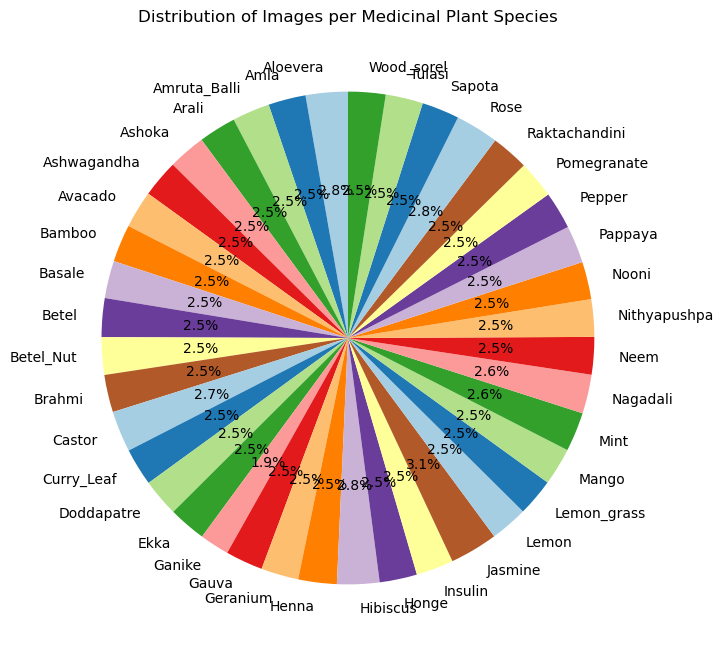

In [5]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
base_dir = r"C:\Users\Mayuri\Desktop\Medical plant identification\Medicinal plant dataset"
img_height, img_width = 224, 224
batch_size = 32

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load the training data
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',         # Set as training data
    shuffle=True
)

# Get class labels and their corresponding index
class_labels = list(train_generator.class_indices.keys())

# Manually count images in each class directory
class_counts = {class_label: len(os.listdir(os.path.join(base_dir, class_label))) 
                for class_label in class_labels}

# Plot the Bar Plot
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts.values(), color='skyblue')
plt.title('Number of Images per Medicinal Plant Species')
plt.xticks(rotation=90)
plt.xlabel('Plant Species')
plt.ylabel('Number of Images')
plt.show()

# Plot the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Images per Medicinal Plant Species')
plt.show()


Found 4765 images belonging to 40 classes.


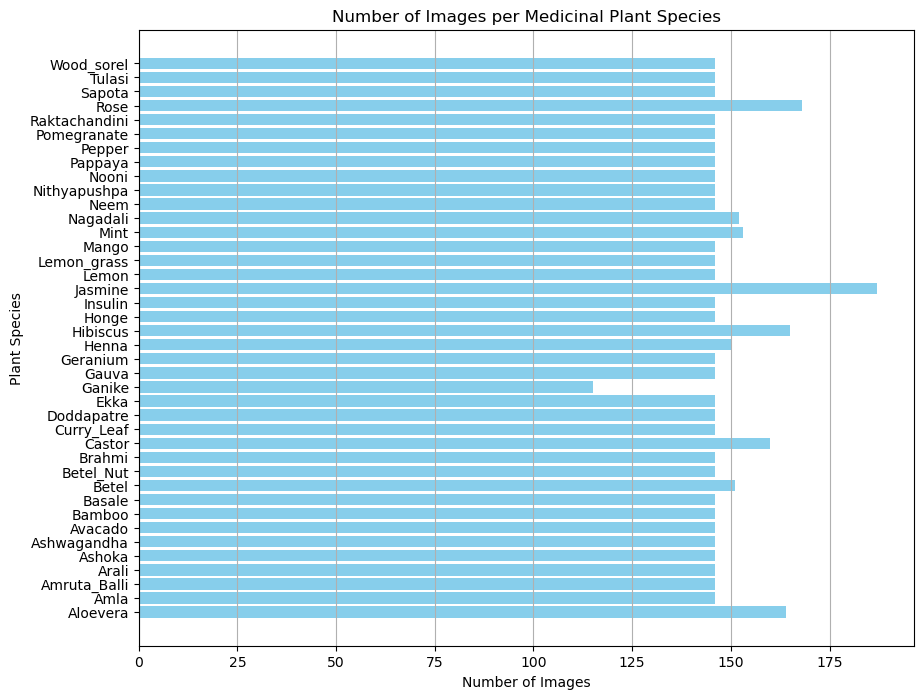

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
base_dir = r"C:\Users\Mayuri\Desktop\Medical plant identification\Medicinal plant dataset"
img_height, img_width = 224, 224
batch_size = 32

# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load the training data
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',         # Set as training data
    shuffle=True
)

# Get class labels and their corresponding index
class_labels = list(train_generator.class_indices.keys())

# Manually count images in each class directory
class_counts = {class_label: len(os.listdir(os.path.join(base_dir, class_label))) 
                for class_label in class_labels}

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(class_labels, class_counts.values(), color='skyblue')
plt.title('Number of Images per Medicinal Plant Species')
plt.ylabel('Plant Species')
plt.xlabel('Number of Images')
plt.grid(axis='x')  # Optional: Add grid lines along the x-axis
plt.show()


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Base Model
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Adding Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(40, activation='softmax')(x)

# Creating the Model
model = Model(inputs=base_model.input, outputs=predictions)


C:\Users\Mayuri\AppData\Local\Temp\ipykernel_13940\1862344047.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('C:\\Users\\Mayuri\\Desktop\\Medical plant identification\\medicinal_plant_classifier.h5')


In [7]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 3,610,730 (13.77 MB)

 Trainable params: 2,558,824 (9.76 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

 Optimizer params: 2 (12.00 B)